[Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/?) by Andreas C. Müller & Sarah Guido

# 1. Introduction

## A First Application: Classifying Iris Species

In [1]:
# !pip install mglearn

In [2]:
import sys
print('Python version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib as plt
print('matplotlib version: {}'.format(plt.__version__))
%matplotlib inline
      
import numpy as np
print('NumPy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))
      
import IPython
print('IPython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))
      
import mglearn
print('mglearn version: {}'.format(mglearn.__version__))

Python version: 3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]
pandas version: 1.5.3
matplotlib version: 3.7.0
NumPy version: 1.23.5
scipy version: 1.10.0
IPython version: 8.10.0
scikit-learn version: 1.2.1
mglearn version: 0.1.9


### Meet the Data: Iris Dataset

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Keys of iris_dataset: \n{}:".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']):


In [5]:
print(iris_dataset['DESCR'][:193] + '\n...' )

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
print('Target names: \n{}'.format(iris_dataset['target_names']))

Target names: 
['setosa' 'versicolor' 'virginica']


In [7]:
print('Feature names: \n{}'.format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print('Type of data: \n{}'.format(type(iris_dataset['data'])))

Type of data: 
<class 'numpy.ndarray'>


In [9]:
print('Shape of data \n{}'.format(iris_dataset['data'].shape))

Shape of data 
(150, 4)


In [10]:
print('First five columns of data: \n{}'.format(iris_dataset['data'][:5]))

First five columns of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print('Type of target {}'.format(type(iris_dataset['target'])))

Type of target <class 'numpy.ndarray'>


In [12]:
print('Shape of target: {}'.format(iris_dataset['target'].shape))

Shape of target: (150,)


In [13]:
print('Target:\n{}'.format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Measuring Success: Training and Testing Data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], 
    iris_dataset['target'], 
    random_state=0)

In [16]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [17]:
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


### First Things First: Look at Your Data

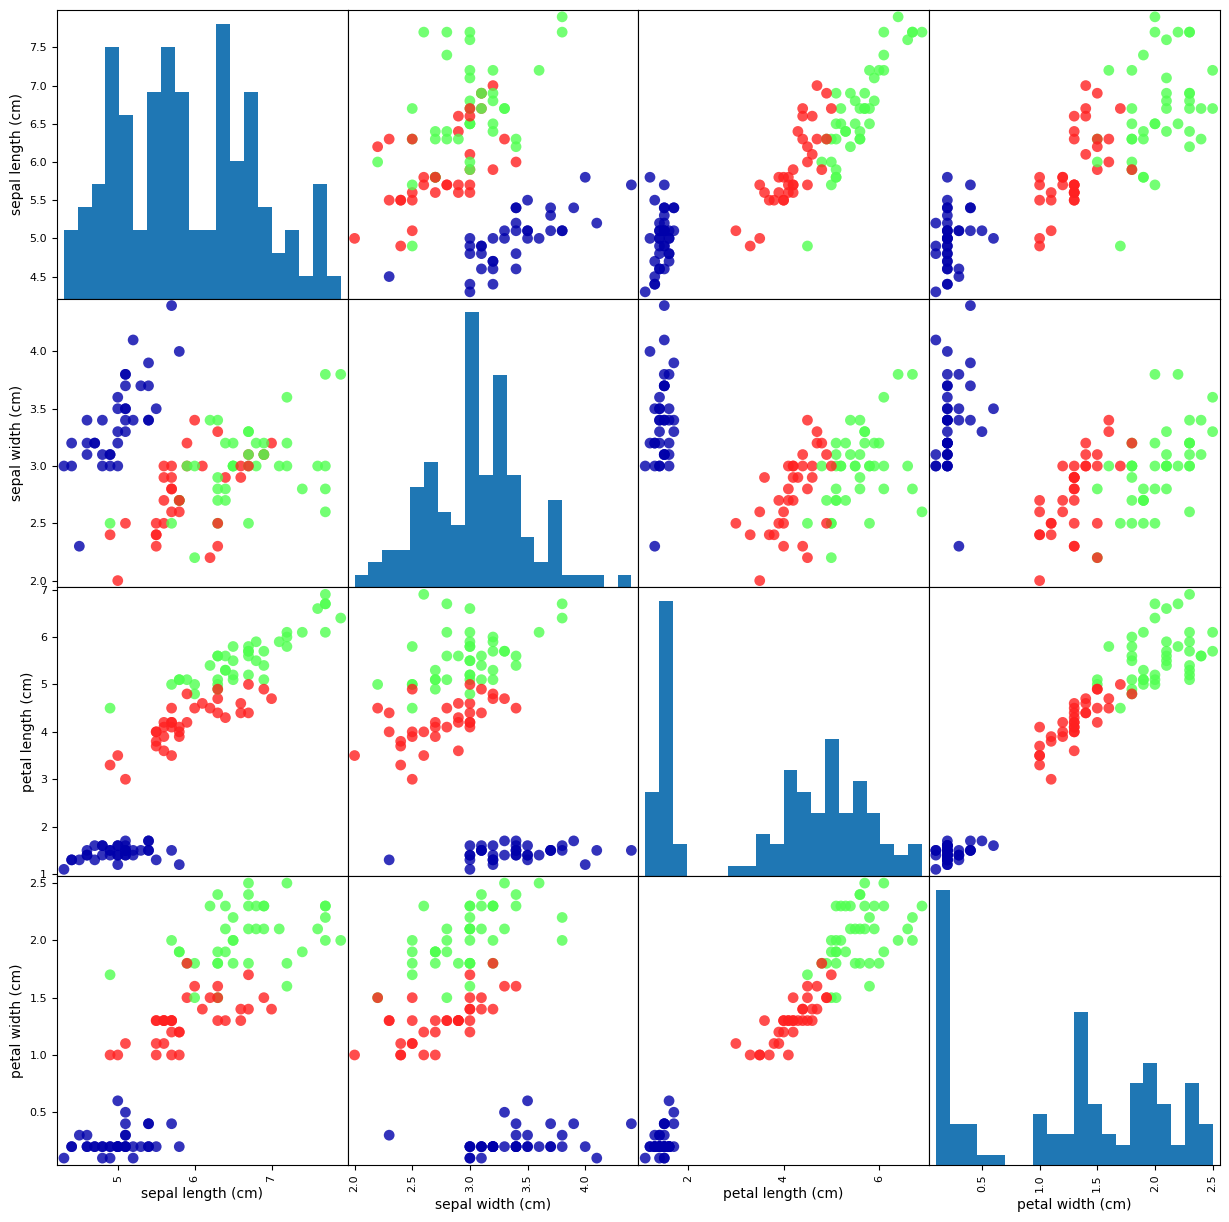

In [18]:
# create dataframe from data in X_train
# label cols using strings in iriis_dataset.feature_names

iris_dataframe = pd.DataFrame(X_train, 
                              columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train

grr = pd.plotting.scatter_matrix(iris_dataframe,
                                 c=y_train,
                                 figsize=(15,15),
                                 marker='o',
                                 hist_kwds={'bins':20},
                                 s=60,
                                 alpha=0.8,
                                 cmap=mglearn.cm3)

### Build First Model: k-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Making Predictions

In [22]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [23]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(
    iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the Model

In [24]:
y_pred = knn.predict(X_test)
print('Test set predictions: \n {}'.format(y_pred))

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [25]:
print('Test set score: {:.2f}'.format(
    np.mean(y_pred == y_test)))

Test set score: 0.97


In [26]:
print('Test set score: {:.2f}'.format(
    knn.score(X_test, y_test)))

Test set score: 0.97


In [27]:
# summary code

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'],
    random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('Test set score: {:.2f}'.format(knn.score(
    X_test, y_test)))

Test set score: 0.97


# 2. Supervised Learning

Two major ML problems: 
- classification (categories)
    - binary classificatoin
    - multiclass classification
- regression (continuity)

generalizability – model to predict on unseen data
overfitting – model too complex, fit too well to training data
underfitting – model too simple

## Supervised ML Algorithms
### Some Sample Datasets

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

X.shape: (26, 2)


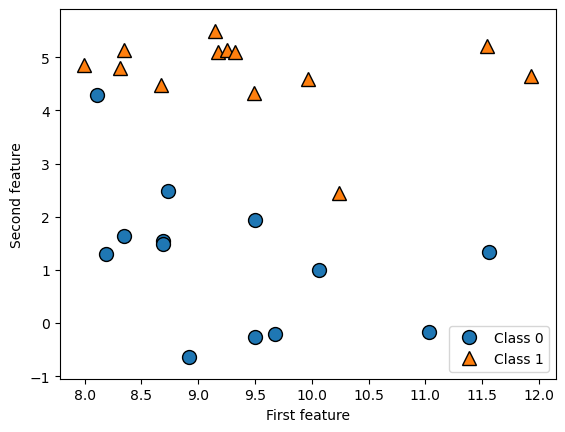

In [29]:
# forge dataset 

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print('X.shape: {}'.format(X.shape))

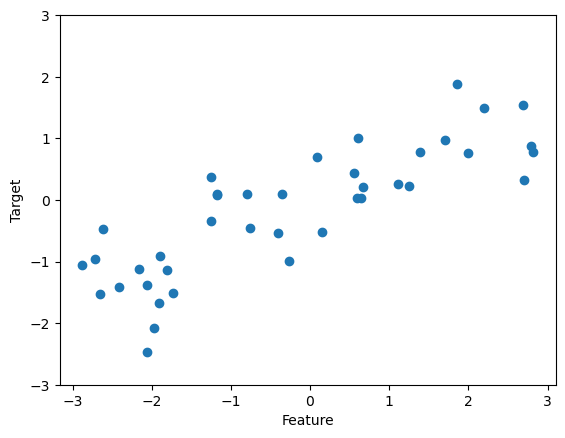

In [30]:
# wave dataset

X,y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target');

In [31]:
# breast cancer dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [32]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [33]:
print('Sample counts per class: \n{}'.format({
    n: v for n, 
    v in zip(
        cancer.target_names,
        np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [34]:
print('Feature names: \n{}'.format(
    cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [35]:
# Boston housing dataset – removed
# from sklearn.datasets import fetch_california_housing

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print('Data shape: {}'.format(housing.data.shape))

Data shape: (20640, 8)


In [36]:
# X, y = mglearn.datasets.load_extended_california

## k-Nearest Neighbors
### k-Neighbors classification

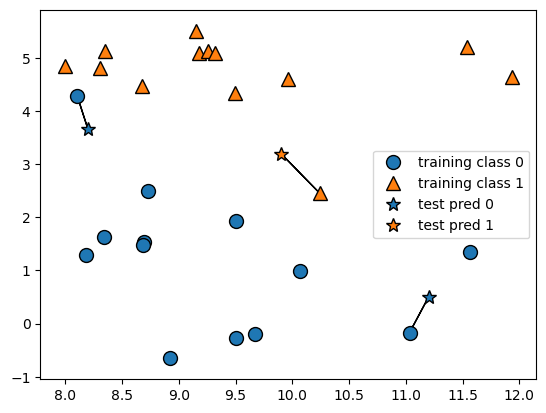

In [37]:
# forge dataset 
mglearn.plots.plot_knn_classification(
    n_neighbors=1)

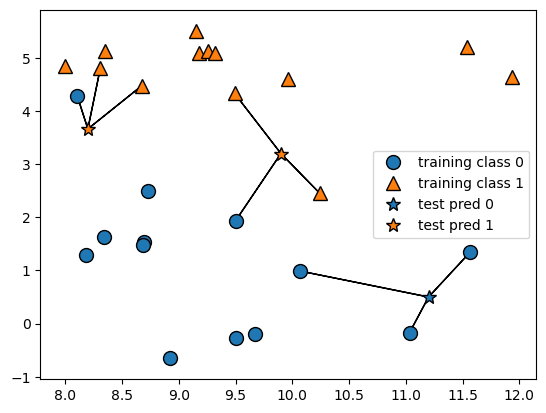

In [38]:
mglearn.plots.plot_knn_classification(
    n_neighbors=3)

In [39]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=0)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [42]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


### Analyzing KNeighbors Classifer

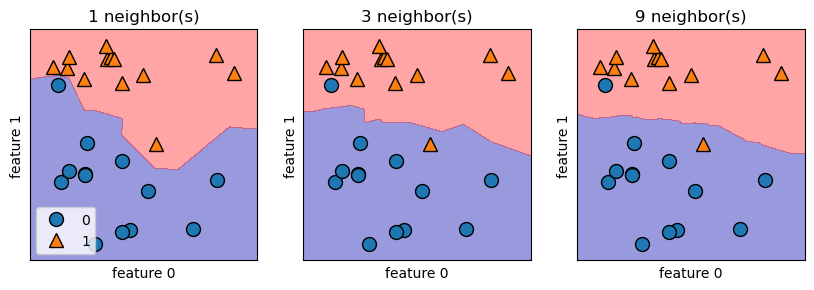

In [43]:
# decision boundary

fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, 
                                  eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3);

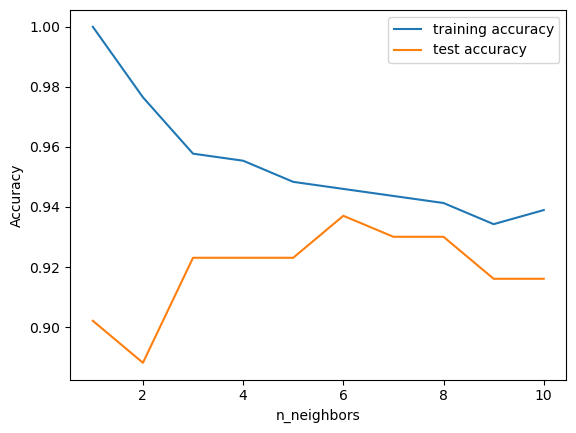

In [44]:
# breast cancer dataset

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();


### k-neighbors regression

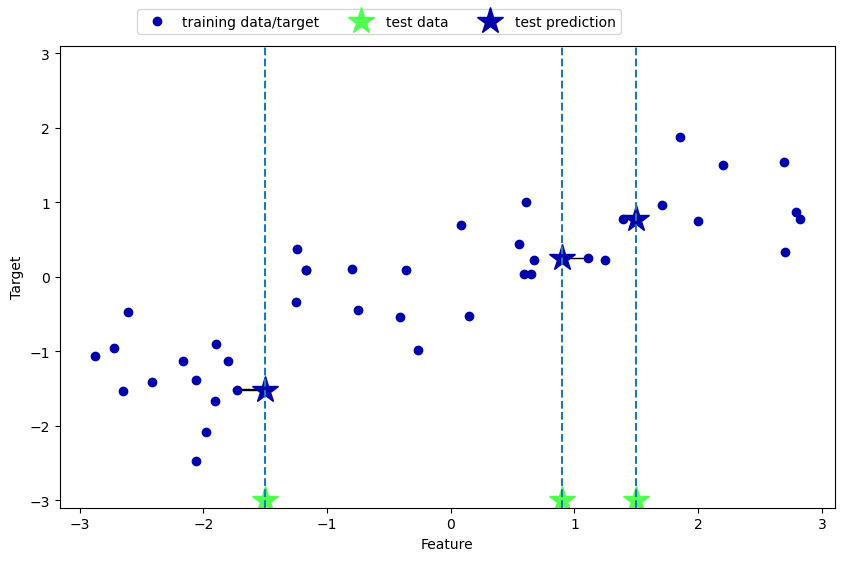

In [45]:
# wave dataset

mglearn.plots.plot_knn_regression(n_neighbors=1)

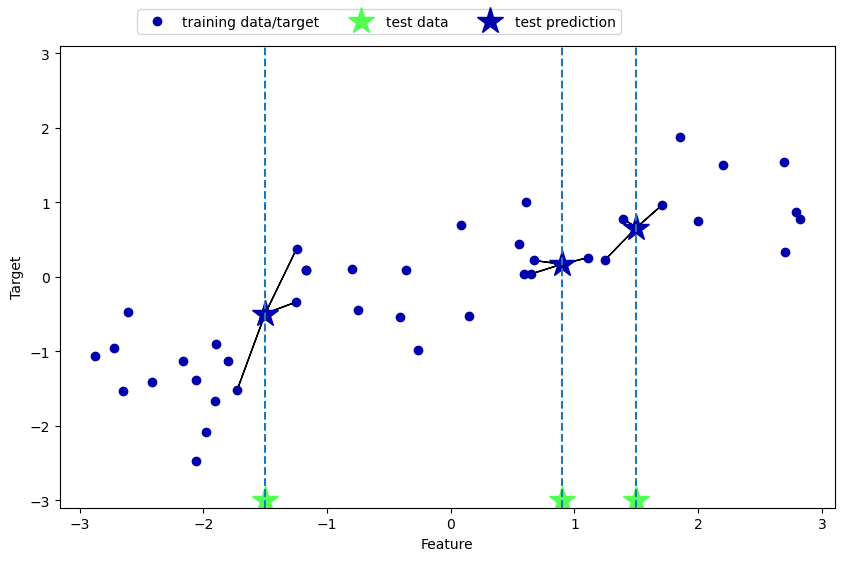

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train,y_test = train_test_split(
    X,y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [48]:
print('Test set predictions: \n{}'.format(
    reg.predict(X_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [49]:
print('Test set R^2: {:.2f}'.format(
    reg.score(X_test, y_test)))

Test set R^2: 0.83


### Analyzing KNeighborsRegressor

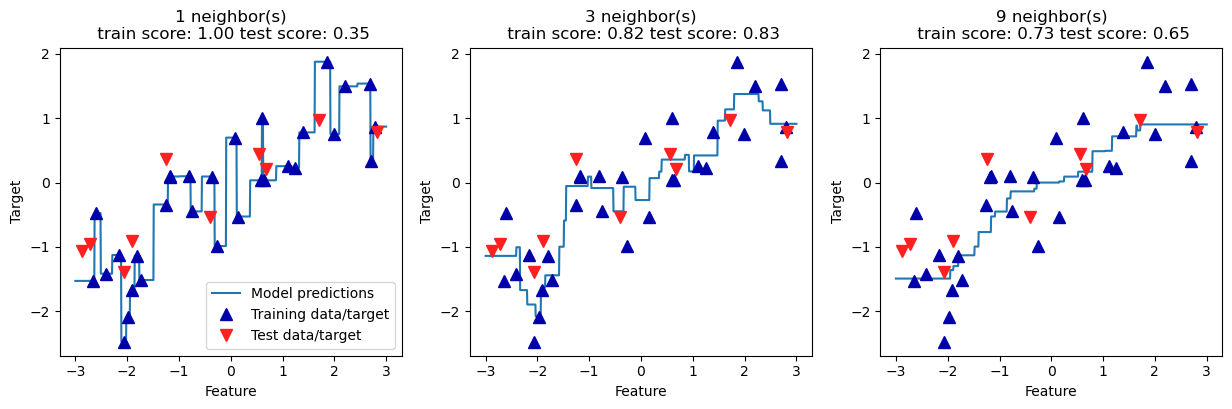

In [50]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    
axes[0].legend(['Model predictions', 
                'Training data/target',
               'Test data/target'], 
               loc='best');
            

## Linear Models

### Linear models for regression

w[0]: 0.393906  b: -0.031804


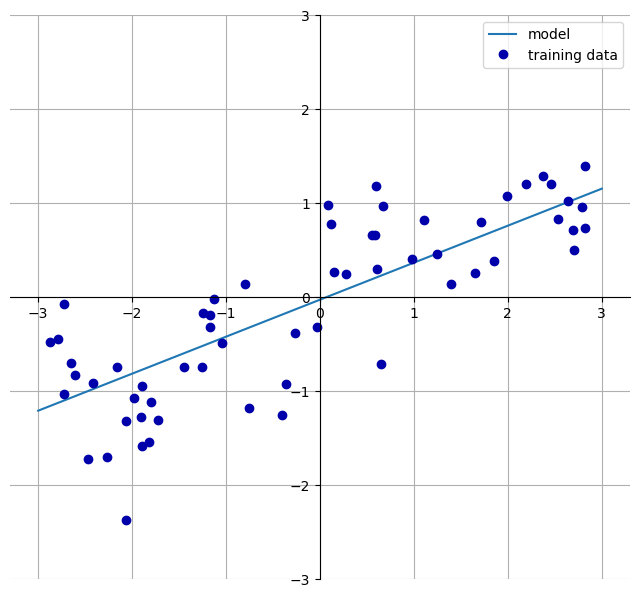

In [51]:
mglearn.plots.plot_linear_regression_wave()

### Linear regression (aka ordinary least squares)

In [52]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept: -0.031804343026759704


In [53]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))


Training set score: 0.67
Test set score: 0.66


In [54]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Ridge regression

- also linear model
- coefficients (w) chosen to fit an additional constraint

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


- score is lower than for LinearRegression, but test score is higher
- expected, Ridge model more restricted, lest likely to overfit
- Ridge model makes trade-off between simplicity and peformance of trainin set (p50)

In [56]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [57]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


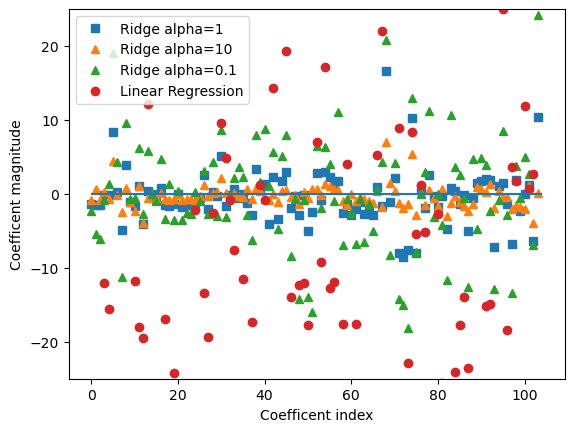

In [58]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, '^', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.xlabel('Coefficent index')
plt.ylabel('Coefficent magnitude')
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend();

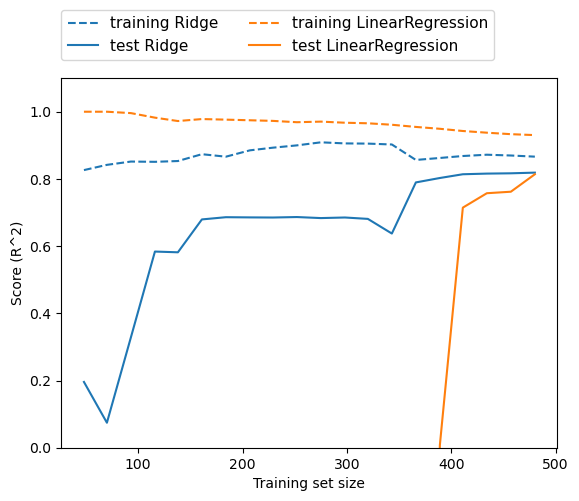

In [59]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [60]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Num features used: {}'.format(np.sum(lasso.coef_ !=0)))


Training set score: 0.29
Test set score: 0.21
Num features used: 4


- performs badly
- shows underfitting on train and test set

In [61]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Num features used: {}'.format(np.sum(lasso001.coef_ !=0)))

Training set score: 0.90
Test set score: 0.77
Num features used: 33


- lower alpha allowed to fit more complex model
- performs better on training and test data

In [62]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Num features used: {}'.format(np.sum(lasso00001.coef_ !=0)))


Training set score: 0.95
Test set score: 0.64
Num features used: 96


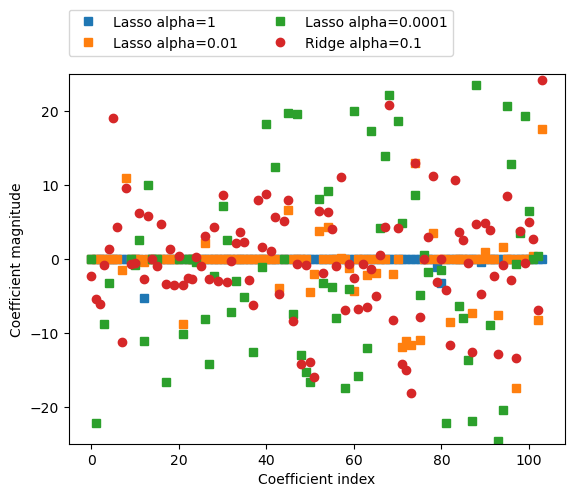

In [63]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, 's', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 's', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude');

### Linear models for classification

- Despite its name, `LogisticRegression` is a classification algorithm and not a regression algorithm, and it should not be confused with `LinearRegression`.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


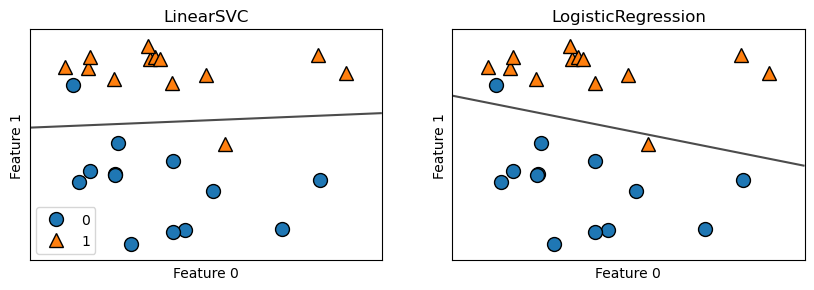

In [65]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend();

- By default, both models apply an L2 regularization, in the same way that Ridge does for regression

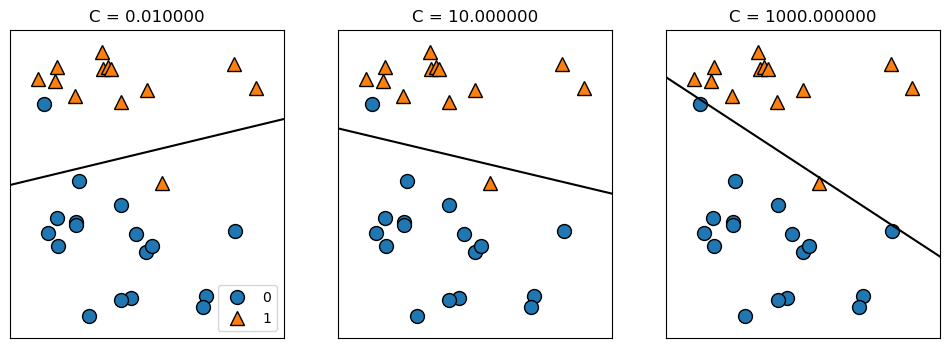

In [66]:
mglearn.plots.plot_linear_svc_regularization()

In [67]:
from sklearn.datasets import load_breast_cancer

In [68]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                   stratify=cancer.target, 
                                                   random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))


Training set score: 0.948
Test set score: 0.958


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))


Training set score: 0.946
Test set score: 0.958


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg001.score(X_test, y_test)))


Training set score: 0.934
Test set score: 0.930


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


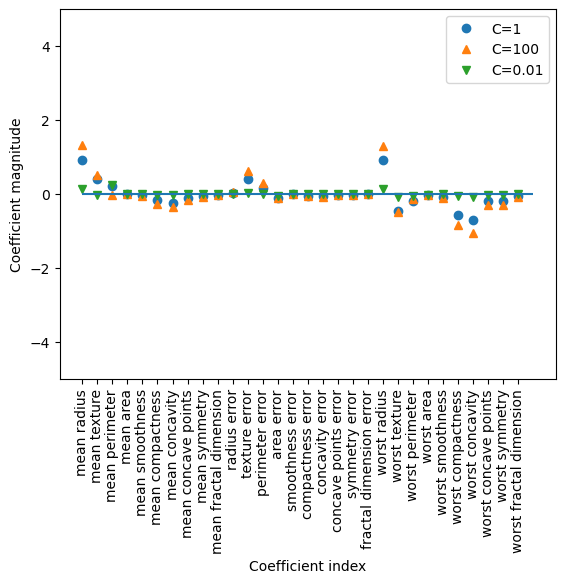

In [71]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend();


In [72]:
# for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
#     lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
#     print('Training accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
#     print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
#     plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

# plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotatation=90)
# plt.hlines(0,0, cancer.data.shape[1])
# plt.xlabel('Coefficient index')
# plt.ylabel('Coefficent magnitude')
# plt.ylim(-5,5)
# plt.legend(loc=3);


### Linear models for multiclass classification 

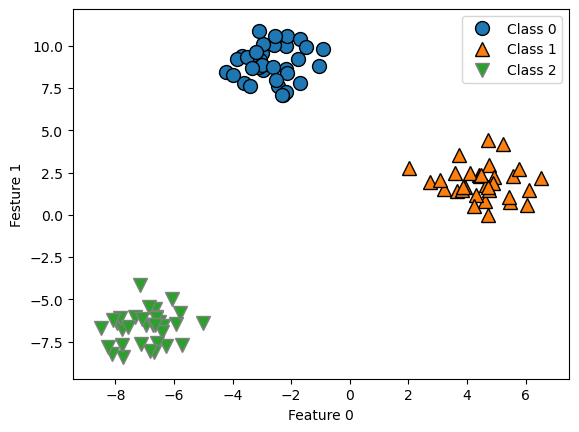

In [73]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Festure 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [74]:
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape)
print('Intercept shape:', linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape: (3,)


In [75]:
# mglearn.discrete_scatter(X[:,0], X[:,1],y)
# line = np.linspace(-15,15)

# for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
#     plt.plot(line, 

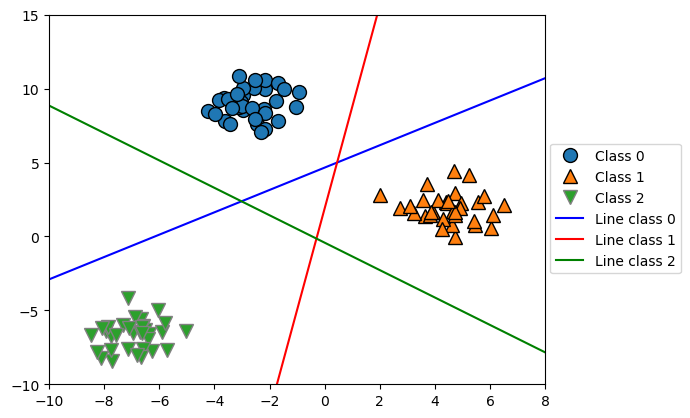

In [76]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01,0.3));


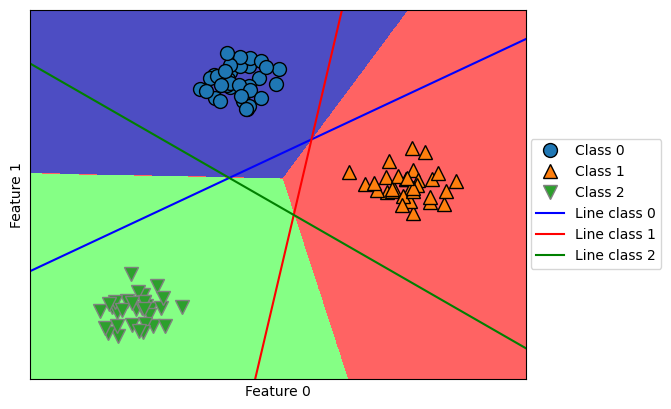

In [77]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

                                  

In [78]:
# method chaining

# logreg = LogisticRegression().fit(X_train, y_train)

# logreg = LogisticRegression()
# y_pred = logreg.fit(X_train, y_train).predict(X_test)


# instatiate model, fit, and predict on one line
# but not ideal, hard to read code, model not stored in variable can't inspect or use to predict on other data
# y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)


## Naive Bayes Classifiers

In [79]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

In [80]:
counts = {}

for label in np.unique(y):
    # iterate over each class
    # count (sum_ entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## Decision Trees

In [81]:
# !pip install graphviz

import graphviz

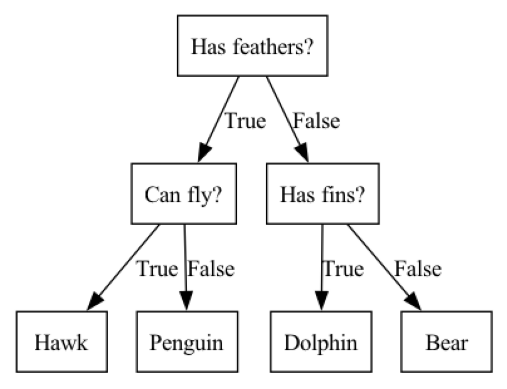

In [82]:
mglearn.plots.plot_animal_tree()

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                   cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [85]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [86]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

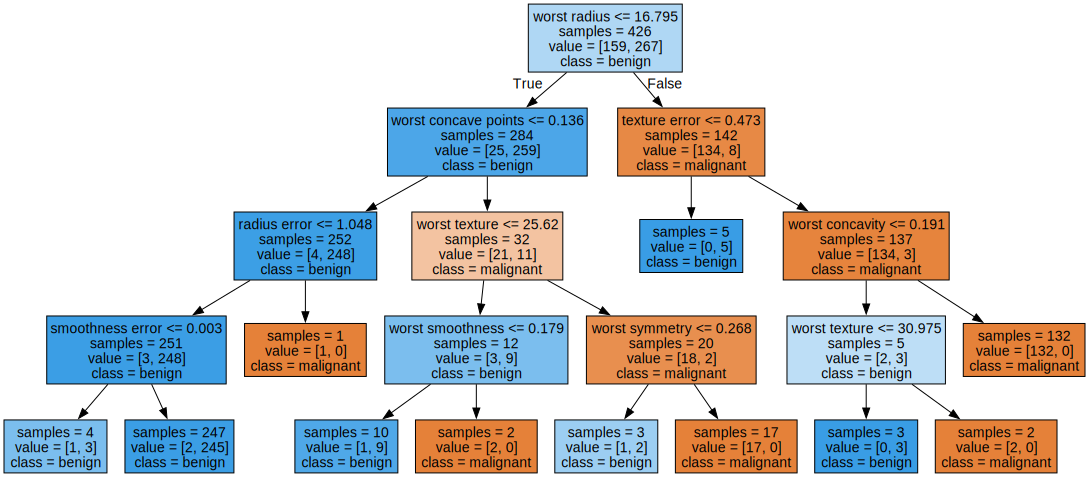

In [87]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)


In [88]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


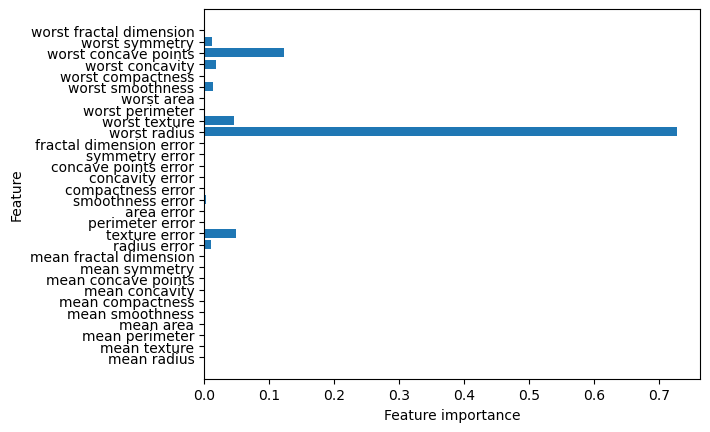

In [89]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


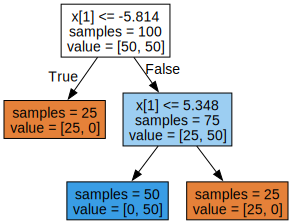

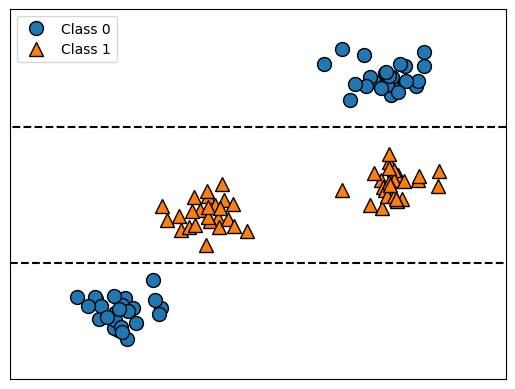

In [90]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

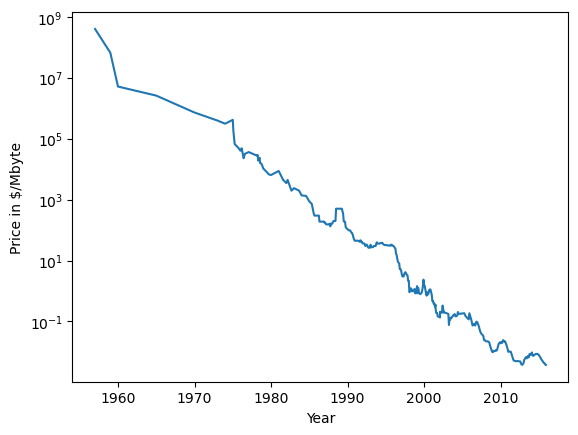

In [91]:
ram_prices = pd.read_csv('/Users/slp22/code/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte');

In [92]:
from sklearn.tree import DecisionTreeRegressor

/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_52271/2483512513.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_52271/2483512513.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


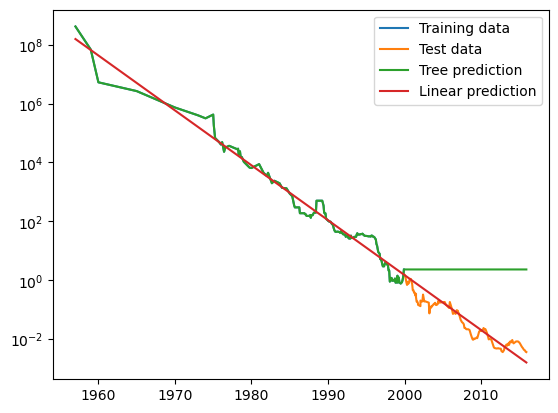

In [93]:
# use historical data to forecast prices after the year 2000

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#predict prirces based on date
X_train = data_train.date[:, np.newaxis]

# use log-trainsform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear prediction')
plt.legend();

In [94]:
#pre-pruning strategies, set either: max_depth, max_lead_nodes, min_samples_leaf enough to prevent overfit

## Ensembles of Decision Trees

In [95]:
# Random forests

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [96]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=5)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=5)

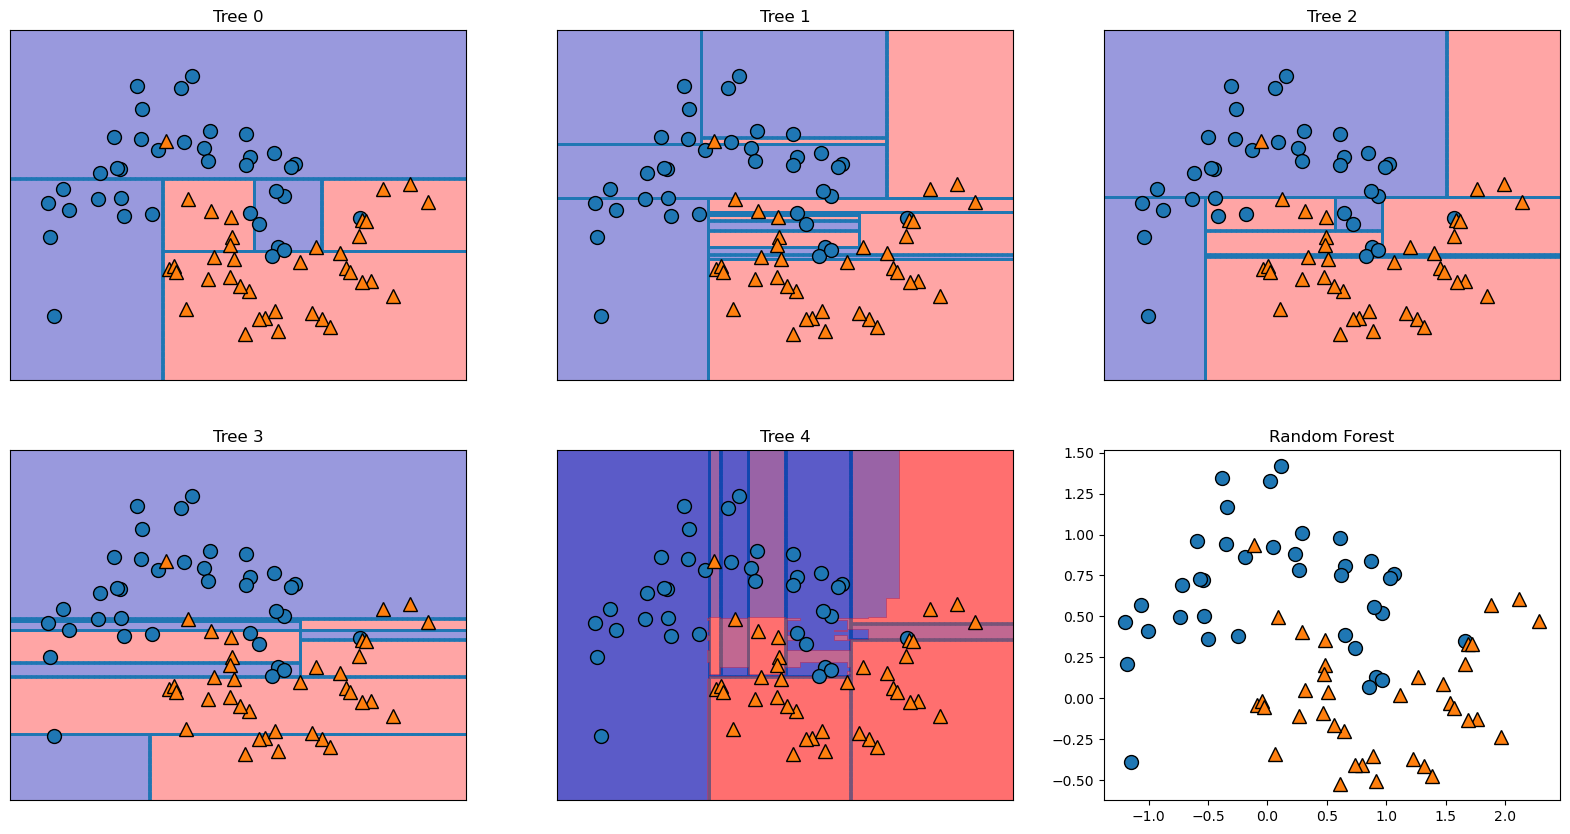

In [100]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,1], alpha=0.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);


In [103]:
#breast cancer dataset

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on testing set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.972


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [107]:
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accruacy on testing set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accruacy on testing set: 0.965


In [108]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [109]:
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accruacy on testing set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accruacy on testing set: 0.972


In [110]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [111]:
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accruacy on testing set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accruacy on testing set: 0.965


In [112]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

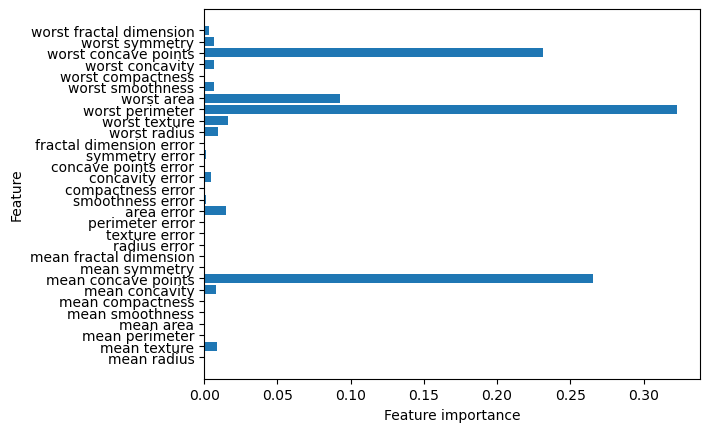

In [113]:
plot_feature_importances_cancer(gbrt)

## Kernalized Support Vector Machines

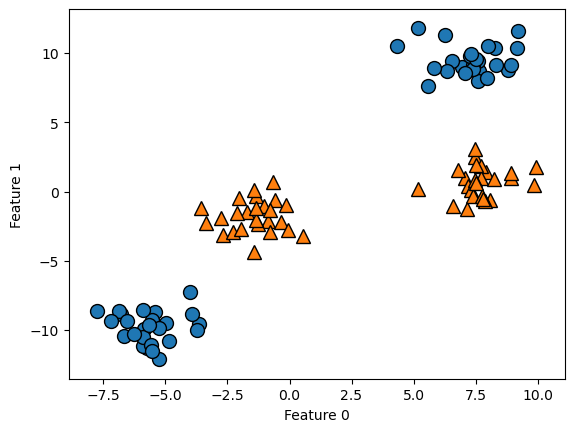

In [116]:
X,y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [117]:
from sklearn.svm import LinearSVC

In [118]:
linear_svm = LinearSVC().fit(X,y)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


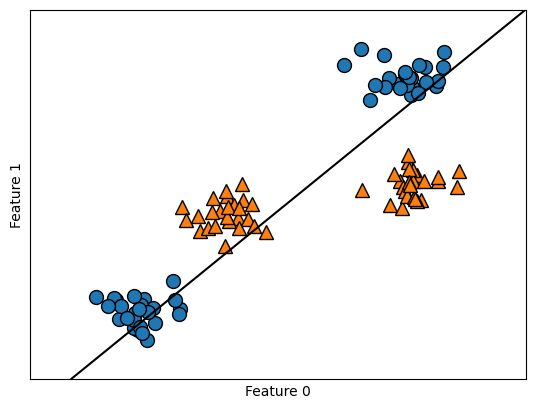

In [120]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [122]:
from mpl_toolkits.mplot3d import Axes3D, axes3d


In [130]:
# add squared first feature
X_new = np.hstack([X, X[:,1:]**2])
figure = plt.figure()

#viz 3D
# ax = Axes3D(figure, elev=-152, azim=-26)
ax = Axes3D(figure, elev=-152, azim=-26)
#plot first all point with y==0, then all y==1
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2])#, c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2])#, c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

In [136]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] ** XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', cmap=mglearn.cm2, s=60)

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature0 ** 2')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_52271/3749972980.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_52271/3749972980.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', cmap=mglearn.cm2, s=60)


Text(0.5, 0, 'feature0 ** 2')

<Figure size 640x480 with 0 Axes>

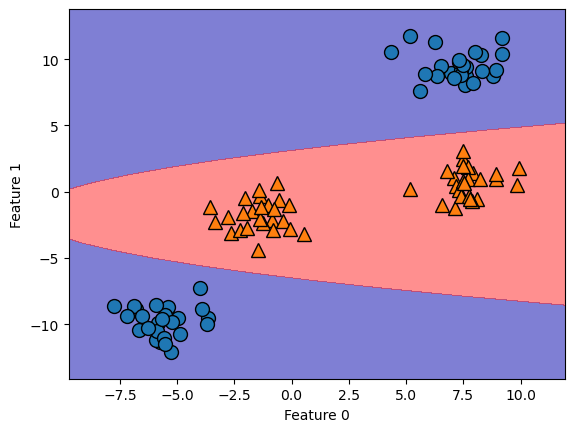

In [138]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [139]:
from sklearn.svm import SVC

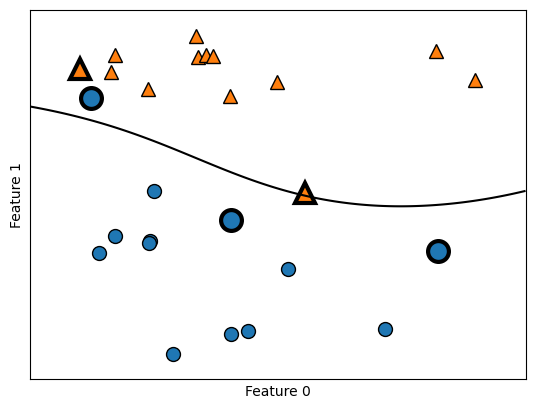

In [142]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

#plot support vectors
sv = svm.support_vectors_

#class labels of support vectors give by sign of dual coef
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

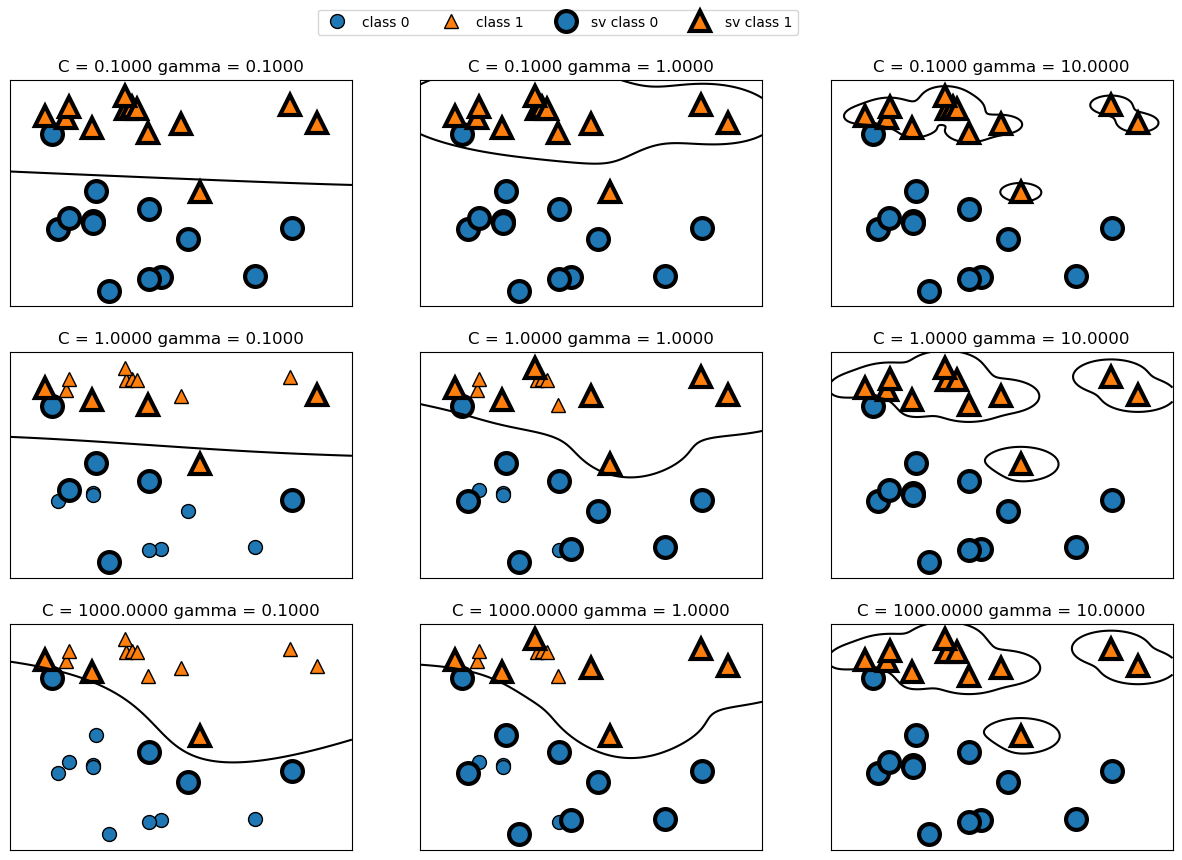

In [146]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
                 mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'], ncol=4, loc=(0.9, 1.2));

In [153]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [154]:
print('Accuracy training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy testing set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy training set: 0.90
Accuracy testing set: 0.94


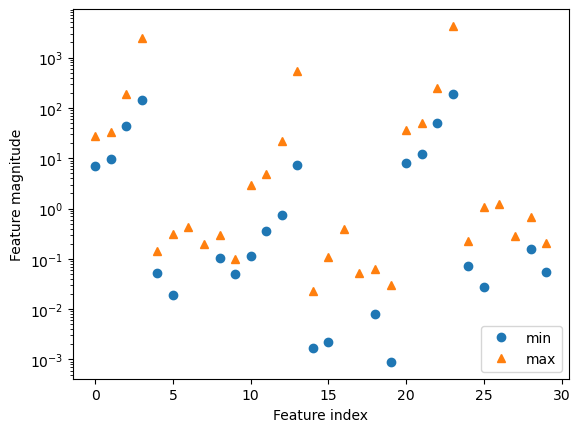

In [158]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.yscale('log')

In [159]:
# compute min val per feature on training set
min_on_training = X_train.min(axis=0)

# compute range each feature (max-min) on training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract min and divide by range
# then, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print('Min for each feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Max for each feature\n{}'.format(X_train_scaled.max(axis=0)))


Min for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Max for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [161]:
# use the same transformation on test set, use min and range of training set
X_test_scaled = (X_test - min_on_training) / range_on_training

In [162]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [163]:
print('Accuracy on training set:{:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on testing set:{:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.984
Accuracy on testing set:0.972


In [164]:
svc = SVC(C=100)
svc.fit(X_train_scaled, y_train)

SVC(C=100)

In [165]:
print('Accuracy on training set:{:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on testing set:{:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:1.000
Accuracy on testing set:0.965


## Neural Networks (Deep Learning) p104

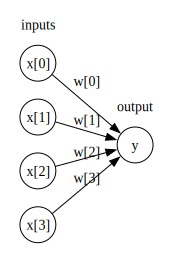

In [166]:
display(mglearn.plots.plot_logistic_regression_graph())

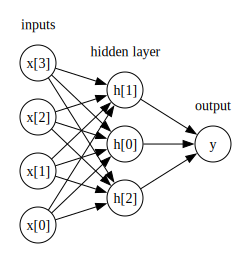

In [167]:
display(mglearn.plots.plot_single_hidden_layer_graph())

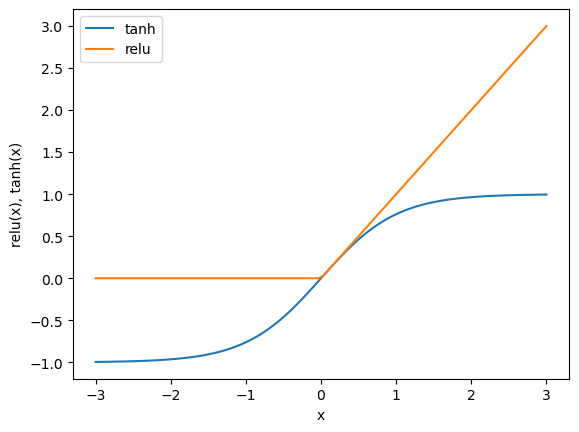

In [169]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)');

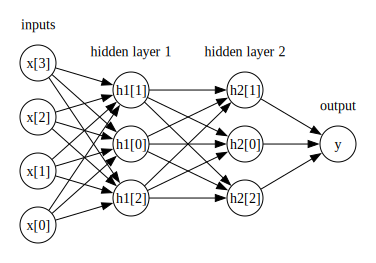

In [170]:
mglearn.plots.plot_two_hidden_layer_graph()

In [171]:
# tuning neural networks
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [185]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

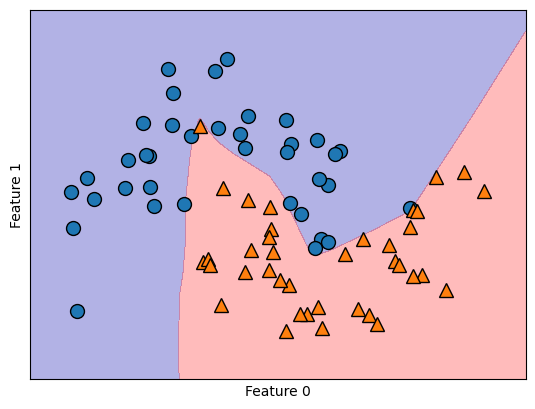

In [186]:
mlp = MLPClassifier(solver ='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


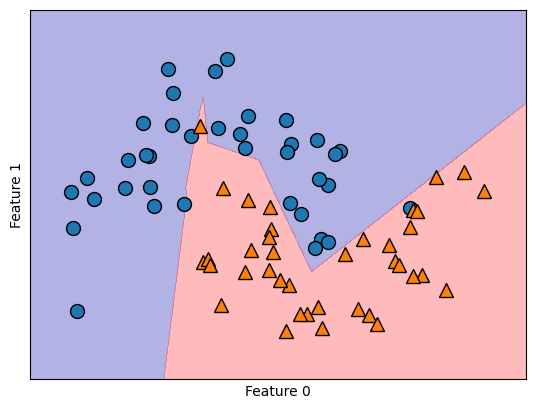

In [188]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])

mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

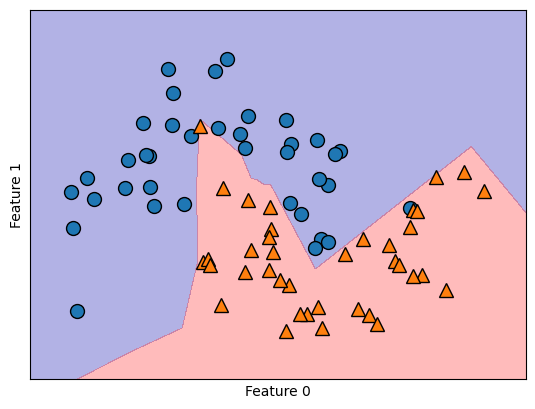

In [190]:
# using 2 hidden layers with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])

mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


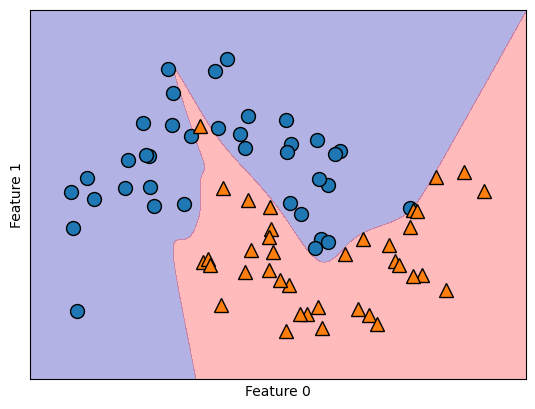

In [191]:
# using 2 hidden layers with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


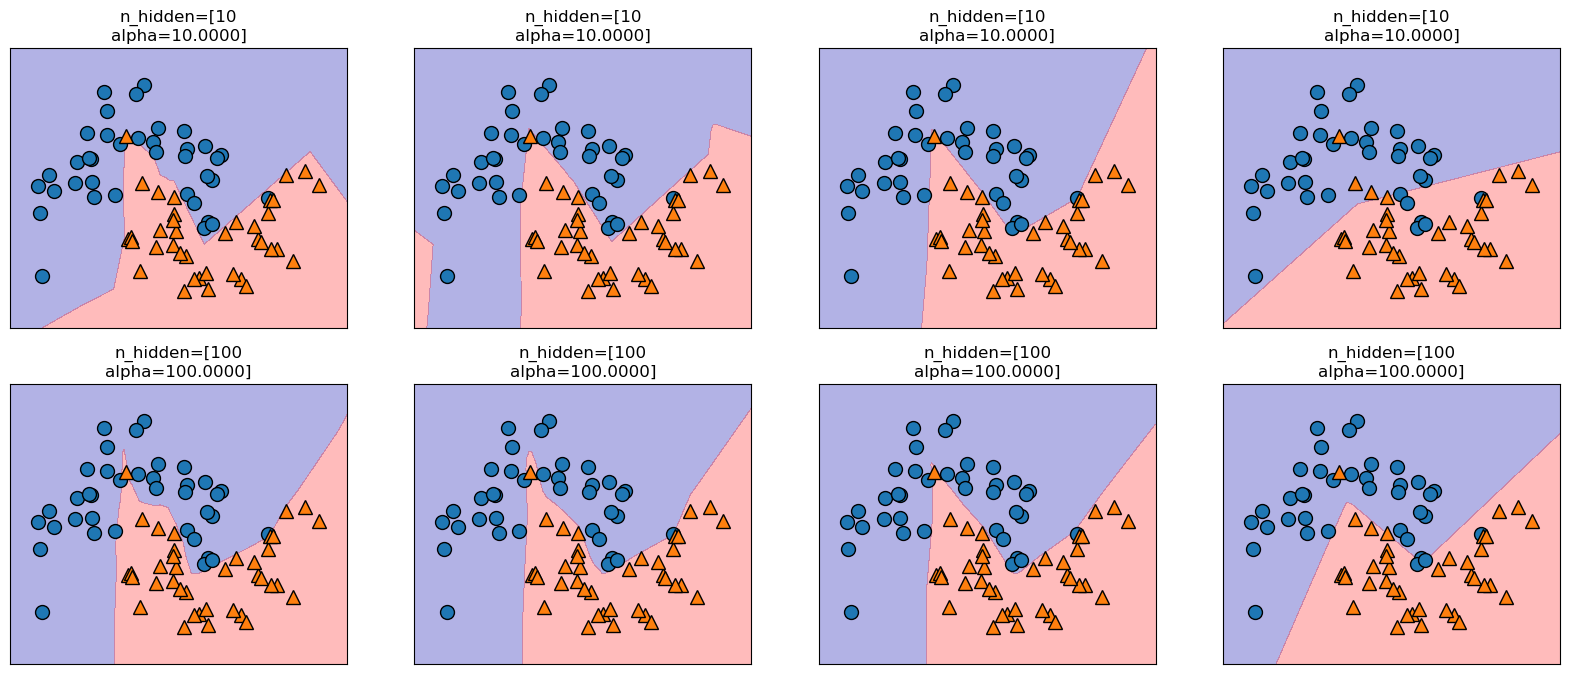

In [193]:
fig, axes = plt.subplots(2,4, figsize=(20,8))

for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}\nalpha={:.4f}]'.format(n_hidden_nodes, n_hidden_nodes, alpha));

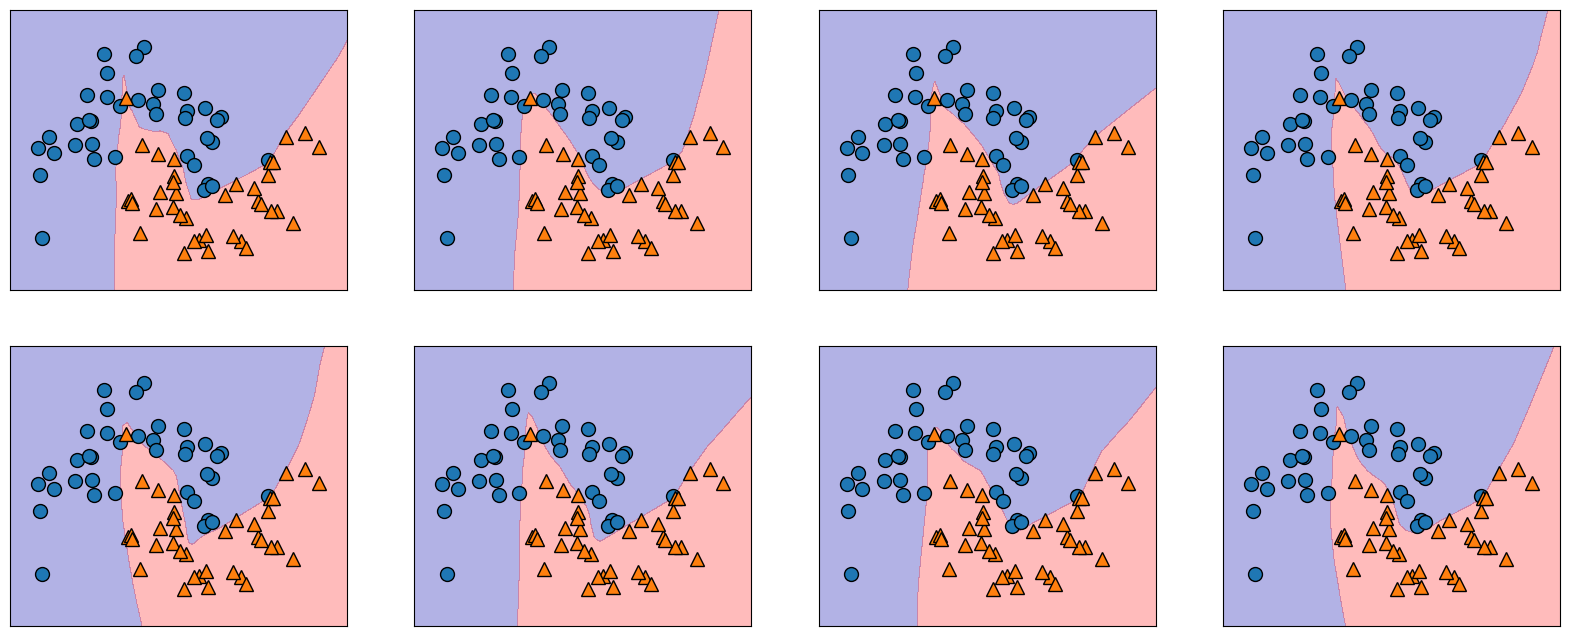

In [194]:
fig, axes = plt.subplots(2,4, figsize=(20,8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax);

In [197]:
print('Cancer data per-feature maxima:\n{}'.format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


# Uncertainty Estimates from Classifiers

# 3. Unsupervised Learning and Preprocessing

## Types of Unsupervised Learning

## Challenges in Unsupervised Learning

## Preprocessing & Scaling

### Different Kinds of Preprocessing

### Applying Data Transformation

### Scaling Training and Test Data the Same Way

### The Effect of Preprocessing on Supervised Learning

## Dimensionality Reduction, Feature Extraction, and Manifold Learning

### Principal Component Analysis

### Non-Negative Matrix Factorization

### Manifold Learning with t-SNE

## Clustering

### k-Means Clustering

### Agglomerative Clustering

### DBSCAN

### Comparing and Evaulating Clustering Algorithms

### Summary of Clustering Methods

# 4. Representing Data and Engineering Features 

## Categorical Variables

### One-Hot-Encoding (Dummy Variables)

### Numbers Can Encode Categoricals

## Binning, Discretization, Linear Models, and Trees

## Interactions and Polynomials

## Univariate Nonlinear Transformations

## Automatic Feature Selection

### Univariate Statistics

### Model-Based Feature Selection

### Iterative Feature Selection

## Utlilizing Expert Knowledge

# 5. Model Evaluation and Improvement

## Cross-Validation

## Grid Search

## Evaluation Metrics and Scoring

# 6. Algorithm Chains and Pipelines

## Parameter Selection with Preprocessing

## Building Pipelines

## Using Pipelines in Grid Searches

## The General Pipeline Interface

## Grid-Searching Preprocessing Steps and Model Parameters

## Grid-Searching Which Model to Use

# 7. Working with Text Data

# 8. Wrapping Up